## Initialize

In [1]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [2]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

In [3]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [4]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [5]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

## Calculus

In [6]:
x = np.arange(0.5, 2, 0.01)

In [7]:
def f(x):
    return x**3 - 1 / x

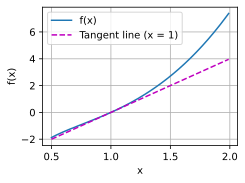

In [8]:
plot(x, [f(x), 4*x-4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x = 1)'])

## Autograd

In [9]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [10]:
x.requires_grad_(True)
x.grad

In [11]:
y = 2 * torch.dot(x, x)

In [12]:
y.backward()
y

tensor(28., grad_fn=<MulBackward0>)

In [13]:
x.grad == 4 * x

tensor([True, True, True, True])

In [14]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [15]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [16]:
a = torch.randn(size=(), requires_grad=True)
a = torch.tensor([-0.0067], requires_grad=True)
d = f(a)
d.backward(retain_graph=True)

In [17]:
a.grad

tensor([26214400.])

In [18]:
def f(x):
    return torch.sin(x)

In [19]:
x = torch.arange(- torch.pi, torch.pi, 0.1)
x.requires_grad_(True)
y = f(x)
y.backward(torch.ones_like(x))
print(x.grad)
print(y)

tensor([-1.0000, -0.9950, -0.9801, -0.9553, -0.9211, -0.8776, -0.8253, -0.7648,
        -0.6967, -0.6216, -0.5403, -0.4536, -0.3624, -0.2675, -0.1700, -0.0707,
         0.0292,  0.1288,  0.2272,  0.3233,  0.4161,  0.5048,  0.5885,  0.6663,
         0.7374,  0.8011,  0.8569,  0.9041,  0.9422,  0.9710,  0.9900,  0.9991,
         0.9983,  0.9875,  0.9668,  0.9365,  0.8968,  0.8481,  0.7910,  0.7259,
         0.6536,  0.5748,  0.4903,  0.4008,  0.3073,  0.2108,  0.1122,  0.0124,
        -0.0875, -0.1865, -0.2837, -0.3780, -0.4685, -0.5544, -0.6347, -0.7087,
        -0.7756, -0.8347, -0.8855, -0.9275, -0.9602, -0.9833, -0.9965])
tensor([ 8.7423e-08, -9.9833e-02, -1.9867e-01, -2.9552e-01, -3.8942e-01,
        -4.7943e-01, -5.6464e-01, -6.4422e-01, -7.1736e-01, -7.8333e-01,
        -8.4147e-01, -8.9121e-01, -9.3204e-01, -9.6356e-01, -9.8545e-01,
        -9.9749e-01, -9.9957e-01, -9.9166e-01, -9.7385e-01, -9.4630e-01,
        -9.0930e-01, -8.6321e-01, -8.0850e-01, -7.4571e-01, -6.7546e-01,
   

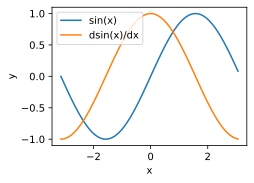

In [20]:
import matplotlib.pyplot as plt
plt.plot(x.detach().numpy(), y.detach().numpy(), label='sin(x)')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='dsin(x)/dx')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Probability

In [21]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [22]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(10000, fair_probs).sample() / 10000

tensor([0.1569, 0.1664, 0.1672, 0.1645, 0.1678, 0.1772])

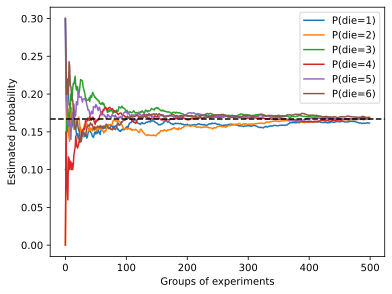

In [23]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

## Linear-regression

In [24]:
import time
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [25]:
import math
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

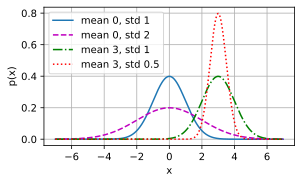

In [26]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1), (3, 0.5)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

In [27]:
#求二阶导数：f(x)=x^2+sinx→f'(x)=2x+cosx→f''(x)=2-sinx
#这里取x=π/2,π
import math
import torch
import numpy as np

x = torch.tensor([math.pi/2,math.pi],requires_grad=True)
y = x**2 + torch.sin(x)

#和真实值比较
true_dy = 2*x+torch.cos(x)  # 这个结果有两个量，一个是张量另一个是梯度类型
true_d2y = 2 - torch.sin(x)

#求出一阶导，保存计算图后再去求二阶导
dy = torch.autograd.grad(y,x,
                         grad_outputs=torch.ones(x.shape),#这个参数要人为指定好
                         create_graph=True,
                         retain_graph=True#保存计算图
                        )
#在张量后加上.detach().numpy()可以仅输出张量数值
print("一阶导真实值：{} \n一阶导计算值：{}".format(true_dy.detach().numpy(),dy[0].detach().numpy()))

#求二阶导。上面的dy的第一个元素是一阶导数值
d2y = torch.autograd.grad(dy[0],x,
                         grad_outputs=torch.ones(x.shape),
                         create_graph=False#不再弄计算图，销毁前面的计算图
                         )
print("\n二阶导真实值：{} \n二阶导计算值：{}".format(true_d2y.detach().numpy(),d2y[0].detach().numpy()))


一阶导真实值：[3.1415927 5.2831855] 
一阶导计算值：[3.1415927 5.2831855]

二阶导真实值：[1. 2.] 
二阶导计算值：[1. 2.]


## SDG

In [28]:
import random
import torch
from d2l import torch as d2l
import numpy as np

def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [29]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.5742,  0.9548]) 
label: tensor([-2.1929])


In [30]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [31]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.5346,  1.0778],
        [ 0.2941, -1.2071],
        [ 1.9679,  1.1157],
        [ 0.2669, -1.4426],
        [ 0.1161,  0.3444],
        [-1.1250, -0.2482],
        [-0.8294,  0.3355],
        [-1.1471, -0.8487],
        [-0.3550, -0.0538],
        [ 0.3587, -1.2548]]) 
 tensor([[1.5990],
        [8.9170],
        [4.3183],
        [9.6516],
        [3.2717],
        [2.7835],
        [1.3996],
        [4.7938],
        [3.6807],
        [9.2027]])


In [32]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w)
print(b)
print(w.shape == true_w.shape)
print(b == true_b)

tensor([[-0.0049],
        [ 0.0092]], requires_grad=True)
tensor([0.], requires_grad=True)
False
tensor([False])


In [33]:
def linreg(X, w, b):
    return torch.matmul(X, w) +b

In [34]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [35]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [36]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [37]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.052503
epoch 2, loss 0.000249
epoch 3, loss 0.000053


In [38]:
print(w)
print(true_w)
print(b)
print(true_b)
print(true_w - w)

tensor([[ 1.9989],
        [-3.3990]], requires_grad=True)
tensor([ 2.0000, -3.4000])
tensor([4.1991], requires_grad=True)
4.2
tensor([[ 1.0804e-03, -5.3989e+00],
        [ 5.3990e+00, -9.8181e-04]], grad_fn=<SubBackward0>)


In [39]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0011, -0.0010], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0009], grad_fn=<RsubBackward1>)


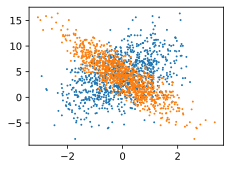

In [40]:
d2l.set_figsize()
x0 = features[:, (0)].detach().numpy()
x1 = features[:, (1)].detach().numpy()
rw = w.detach().numpy()
d2l.plt.scatter(x0, labels.detach().numpy(), 1)
d2l.plt.scatter(x1, labels.detach().numpy(), 1)
b = b.detach().numpy()


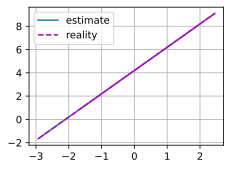

In [41]:
d2l.plot(x0, [(rw[0] * x0) + b, (true_w[0] * x0) + true_b], legend=['estimate', 'reality'])

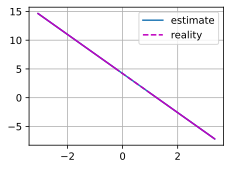

In [42]:
d2l.plot(x1, [(rw[1] * x1) + b, (true_w[1] * x1) + true_b], legend=['estimate', 'reality'])

## Simple API Implement about SDG

In [43]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

In [44]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [45]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [46]:
next(iter(data_iter))

[tensor([[-0.0397, -1.3530],
         [-1.0752,  0.1933],
         [ 1.1191,  0.1844],
         [ 0.1791, -1.1221],
         [ 1.1127,  1.0624],
         [-1.6393,  0.1589],
         [-1.5477,  0.9560],
         [ 0.5711, -1.3979],
         [-0.5425, -1.6523],
         [ 1.1567, -0.7528]]),
 tensor([[ 8.7303],
         [ 1.3997],
         [ 5.8073],
         [ 8.3788],
         [ 2.8189],
         [ 0.3800],
         [-2.1451],
         [10.0799],
         [ 8.7357],
         [ 9.0674]])]

In [47]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))

In [48]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [49]:
loss = nn.MSELoss()

In [50]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [51]:
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')


epoch 1, loss 0.000394
epoch 2, loss 0.000105
epoch 3, loss 0.000105
epoch 4, loss 0.000104
epoch 5, loss 0.000105
epoch 6, loss 0.000105
epoch 7, loss 0.000105
epoch 8, loss 0.000105
epoch 9, loss 0.000106
epoch 10, loss 0.000104


In [52]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([ 0.0007, -0.0004])
b的估计误差： tensor([-0.0003])


In [53]:
def hloss(y_hat, y, delta): # Huber loss
    if abs(y_hat - y) > delta:
        return abs(y_hat - y) - delta / 2
    else:
        return (y_hat - y) ** 2 / (2*delta) 

## Softmax Regression

$$
P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)}).
$$

$$
-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}),
$$

$$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j. $$

#### Explanation:

$$
P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)}) = \prod_{j=1}^q (\hat{y}_j^{(i)})^{y_j^{(i)}}
$$

$$
-\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)}) = -\log \prod_{j=1}^q (\hat{y}_j^{(i)})^{y_j^{(i)}} = - \sum_{j=1}^q y_j^{(i)} \log \hat{y}_j^{(i)}
$$

#### Derivative

$$
\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j\\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j.
\end{aligned}
$$

$$
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j.
$$

## Image_Classification

### Get Data

In [54]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

In [55]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True
)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True
)

In [56]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [57]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [58]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirts', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [59]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 't-shirts'}>,
       <Axes: title={'center': 't-shirts'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirts'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirts'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirts'}>], dtype=object)

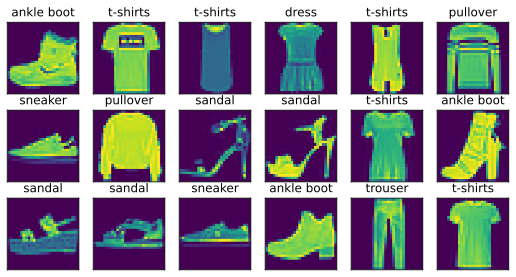

In [60]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 3, 6, titles=get_fashion_mnist_labels(y))

## Read or Load

In [61]:
batch_size = 256

def get_dataloader_workers():
    """使用4个进程读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

In [62]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():f} sec'

'14.091238 sec'

In [63]:
def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [64]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


## Process

In [65]:
import torch
from IPython import display
from d2l import torch as d2l

In [66]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [67]:
num_inputs = 784
num_outputs = 10

w = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [68]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition

In [69]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
f"{X_prob}, {X_prob.sum(1)}"

'tensor([[0.1649, 0.1311, 0.0621, 0.4253, 0.2167],\n        [0.0364, 0.1350, 0.2196, 0.5339, 0.0752]]), tensor([1., 1.])'

In [70]:
def net(X):
    return softmax(torch.matmul(X.reshape(-1, w.shape[0]), w) + b)

In [71]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [72]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [1]:
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [2]:
accuracy(y_hat, y) / len(y)

NameError: name 'y_hat' is not defined

In [75]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [76]:
def evaluate_accuracy(net, data_iter):  # Test
    if isinstance(net, torch.nn.Module):
        net.eval()
    metric = Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [77]:
evaluate_accuracy(net, test_iter)

0.1537

In [78]:
def train_epoch_ch3(net, train_iter, loss, updater):
    if isinstance(net, torch.nn.Module):
        net.train()
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]
            


In [79]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [80]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc 

In [81]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([w, b], lr, batch_size)

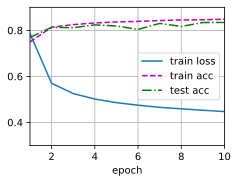

In [82]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

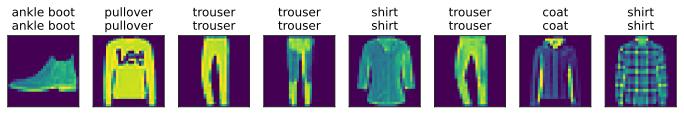

In [83]:
def predict_ch3(net, test_iter, n=6):
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels((net(X).argmax(axis=1)))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n]
    )

predict_ch3(net, test_iter, 8)

In [84]:
A = torch.tensor([[100, 100], [50, 50]])
A_prob = softmax(A)
print(A_prob)
print(A_prob.sum(1))

tensor([[   nan,    nan],
        [0.5000, 0.5000]])
tensor([nan, 1.])


## Simple API Implement about Softmax

In [85]:
import torch
from torch import nn
from  d2l import torch as d2l

In [86]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [87]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weight)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [88]:
loss = nn.CrossEntropyLoss(reduction='none')

In [89]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.1)

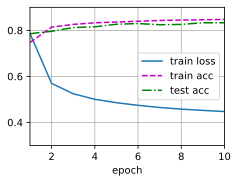

In [90]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

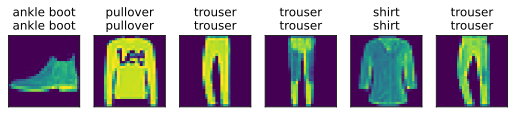

In [91]:
def predict_ch3(net, test_iter, n=6):
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels((net(X).argmax(axis=1)))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n]
    )

predict_ch3(net, test_iter, 6)